In [27]:
import pandas as pd


df = pd.read_csv('https://raw.githubusercontent.com/sejongsmarcle/2022_Winter_AiStudy-1/main/dataset/pima-indians-diabetes.csv', names=['pregnant', 'plasma', 'pressure', 'thickness', 'insulin', 'BMI', 'predigree', 'age', 'class'])

df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,predigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   predigree  768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
print(df[['pregnant', 'class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
plt.figure(figsize=(12, 12))

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<AxesSubplot: >

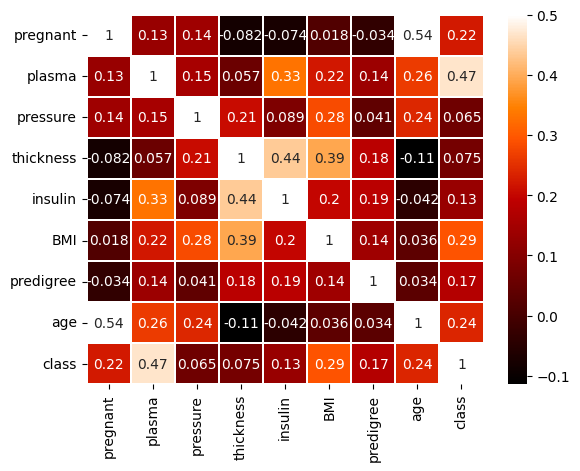

In [20]:
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)

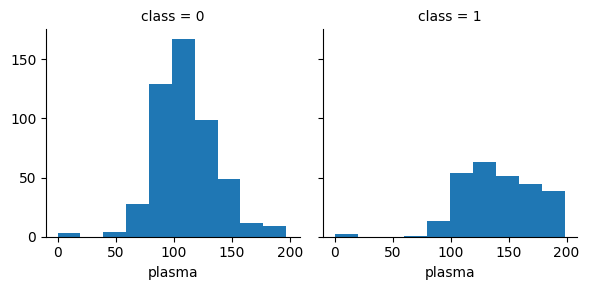

In [22]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

In [38]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(3)
tf.random.set_seed(3)

dataset = np.loadtxt('https://raw.githubusercontent.com/sejongsmarcle/2022_Winter_AiStudy-1/main/dataset/pima-indians-diabetes.csv', delimiter=',')

X = dataset[:, 0:8]
Y = dataset[:, 8]

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(X, Y, epochs=200, batch_size=10)

Epoch 1/200


2023-02-06 23:46:24.741715: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


77/77 [==============================] - 0s 513us/step - loss: 13.2298 - accuracy: 0.3581
Epoch 2/200
77/77 [==============================] - 0s 411us/step - loss: 1.2037 - accuracy: 0.4531
Epoch 3/200
77/77 [==============================] - 0s 390us/step - loss: 0.9968 - accuracy: 0.5586
Epoch 4/200
77/77 [==============================] - 0s 403us/step - loss: 0.8940 - accuracy: 0.5938
Epoch 5/200
77/77 [==============================] - 0s 403us/step - loss: 0.8486 - accuracy: 0.5885
Epoch 6/200
77/77 [==============================] - 0s 396us/step - loss: 0.7930 - accuracy: 0.6159
Epoch 7/200
77/77 [==============================] - 0s 397us/step - loss: 0.7498 - accuracy: 0.6419
Epoch 8/200
77/77 [==============================] - 0s 451us/step - loss: 0.7333 - accuracy: 0.6341
Epoch 9/200
77/77 [==============================] - 0s 392us/step - loss: 0.7126 - accuracy: 0.6315
Epoch 10/200
77/77 [==============================] - 0s 399us/step - loss: 0.7115 - accuracy: 0.6628


77/77 [==============================] - 0s 452us/step - loss: 0.5143 - accuracy: 0.7565
Epoch 82/200
77/77 [==============================] - 0s 522us/step - loss: 0.5227 - accuracy: 0.7422
Epoch 83/200
77/77 [==============================] - 0s 408us/step - loss: 0.5131 - accuracy: 0.7513
Epoch 84/200
77/77 [==============================] - 0s 408us/step - loss: 0.5129 - accuracy: 0.7435
Epoch 85/200
77/77 [==============================] - 0s 404us/step - loss: 0.5210 - accuracy: 0.7669
Epoch 86/200
77/77 [==============================] - 0s 421us/step - loss: 0.5026 - accuracy: 0.7708
Epoch 87/200
77/77 [==============================] - 0s 417us/step - loss: 0.5082 - accuracy: 0.7539
Epoch 88/200
77/77 [==============================] - 0s 411us/step - loss: 0.5044 - accuracy: 0.7617
Epoch 89/200
77/77 [==============================] - 0s 422us/step - loss: 0.5337 - accuracy: 0.7331
Epoch 90/200
77/77 [==============================] - 0s 414us/step - loss: 0.5079 - accuracy: 

77/77 [==============================] - 0s 399us/step - loss: 0.4894 - accuracy: 0.7552
Epoch 161/200
77/77 [==============================] - 0s 394us/step - loss: 0.4751 - accuracy: 0.7617
Epoch 162/200
77/77 [==============================] - 0s 422us/step - loss: 0.4675 - accuracy: 0.7760
Epoch 163/200
77/77 [==============================] - 0s 397us/step - loss: 0.4735 - accuracy: 0.7708
Epoch 164/200
77/77 [==============================] - 0s 391us/step - loss: 0.4999 - accuracy: 0.7630
Epoch 165/200
77/77 [==============================] - 0s 385us/step - loss: 0.4754 - accuracy: 0.7669
Epoch 166/200
77/77 [==============================] - 0s 384us/step - loss: 0.4838 - accuracy: 0.7630
Epoch 167/200
77/77 [==============================] - 0s 375us/step - loss: 0.4624 - accuracy: 0.7747
Epoch 168/200
77/77 [==============================] - 0s 381us/step - loss: 0.4799 - accuracy: 0.7604
Epoch 169/200
77/77 [==============================] - 0s 380us/step - loss: 0.4633 - a

In [40]:
print("\n Accuracy: %.4f" %(model.evaluate(X, Y)[1]))

24/24 [==============================] - 0s 404us/step - loss: 0.4413 - accuracy: 0.7930

 Accuracy: 0.7930
